# Introduzione 

Questa lezione è suddivisa in due parti piuttosto distinte. Forniamo quindi un'introduzione distinta per ognuna di esse.

## Simulated Annealing

In questa prima parte risolviamo sempre il problema del commesso viaggiatore utilizzando però utilizzando la tecnica del **Simulated Annealing**. Essa consiste nella costruzione di un random walk nello spazio delle configurazioni dove ad ogni passo abbassiamo la temperatura. Osserviamo che questo processo ricalca quello di solidificazione di un fluido. Infatti a temperatura $T=0$ il sistema si troverà nello stato di minima energia globale. 

Per svolgere questo calcolo numerico adattiamo il codice scritto nella lezione 10 per l'algoritmo genetico. Chiaramente in questo caso non dobbiamo considerare una popolazione di percorsi ma soltanto un percorso. Per questo motivo abbiamo adattato i metodi `InitialPopulation()` e `FitnessPopulation()` in `InitialRoute()` e `FitnessRoute()` affinchè lavorino solo con una struct `Population current_pop`.

    int main (int argc, char ** argv){

        Input(argc, argv);

        InitialRoute();
        current_route.fitness = FitnessRoute(current_route);

        for (int i=0; i<n_iter; i++){

            T =  1 - (double) (i+1)/n_iter;		
            NewRoute();
            
            ...
        }

        return 0;
    }

Per prima cosa osserviamo che ad ogni ciclo la temperatura viene abbassata `T =  1 - (double) (i+1)/n_iter`. Dopodichè abbiamo definito una nuova funzione `NewRoute()` che è adibita alla creazione di un nuovo percorso a partire da quello esistente. Essa ha la seguente struttura:

* Per prima cosa proponiamo un nuovo percorso a partire da quello precedente. Per farlo utilizziamo le funzioni di mutazione già utilizzate per GA. In questo caso però una sola delle possibili mutazioni agirà sulla `Population current_pop`. 

        void NewRoute(void){
            double select_mutation = rnd.Rannyu();
            if (select_mutation<0.33)
                new_route = InversionMutation(current_route);

            else if(0.33<select_mutation && select_mutation<0.66)
                new_route = PermutationMutation(current_route);

            else
                new_route = ShiftMutation(current_route);

            new_route.fitness = FitnessRoute(new_route);
            attempted++;
            ...
         }
            
* Dopodichè eseguiamo un'integrazione numerica attraverso l'algoritmo di Metropolis per determinare se accettare o meno la modifica di percorso avanzata


Attraverso questo codice, abbiamo risolto il problema del commesso viaggiatore sia nel caso in cui le città siano disposte su un cerchio sia nel caso in cui siano all'interno di un quadrato.

### Cerchio

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import string
from scipy.optimize import curve_fit
import scipy
from scipy.special import erf
from scipy import log, exp, sqrt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stat
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import subprocess as sb
from os import system
import os
import shutil

sns.set_theme(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1.2, color_codes=True, rc=None)

In [2]:
path = '/home/elia/Scrivania/SimulazioneNumerica/Exercises_10/Exercises_10.1/'
path_compare = '/home/elia/Scrivania/SimulazioneNumerica/Exercises_09/Exercises_09.1/'
os.chdir(path)
os.system('make clean');
os.system('make');
os.system('./main.exe 0');

In [3]:
cities =  np.loadtxt(path+"cities.dat")
Fitness =  np.loadtxt(path+"fitness.dat")
bestFitness_compare =  np.loadtxt(path_compare+"fitness_best.dat")

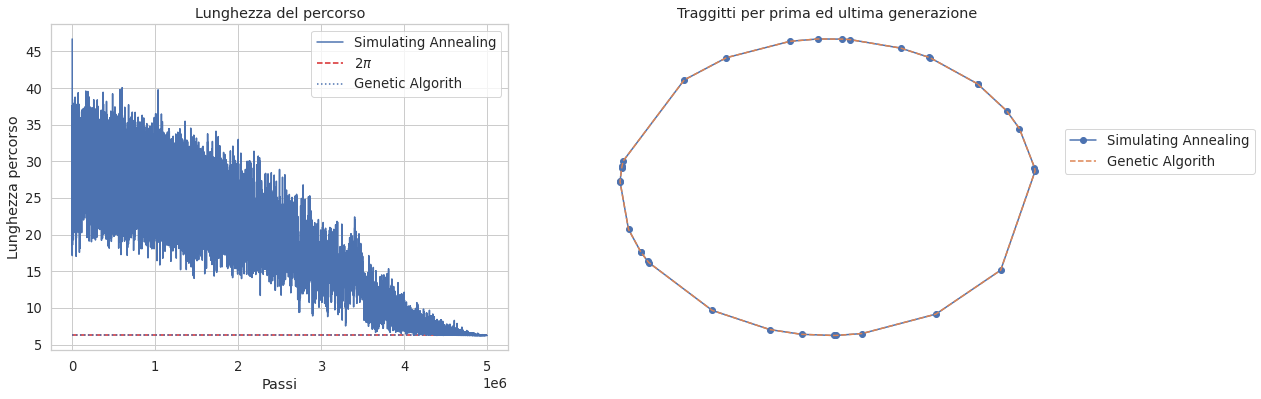

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(18,6));  
ax= ax.ravel()


ax[0].plot(np.arange(0,len(Fitness)*100,100),Fitness, label='Simulating Annealing')
ax[0].hlines(6.28319, 0, len(Fitness)*100, color=plt.cm.tab10(3),linestyle='--', label=r'$2\pi$');
ax[0].hlines(bestFitness_compare[len(bestFitness_compare)-1], 0, len(Fitness)*100,linestyle=':', label='Genetic Algorith');


ax[0].legend()
ax[0].set_title('Lunghezza del percorso')
ax[0].set_xlabel('Passi')
ax[0].set_ylabel('Lunghezza percorso')

best_route = np.loadtxt(path+"route_gen_"+str(5000000)+".dat")
best_route = best_route.astype(int)
ax[1].plot(cities[best_route,0], cities[best_route,1], linestyle='-', marker = 'o', label='Simulating Annealing',alpha=1)

best_route = np.loadtxt(path_compare+"route_gen_200.dat")
best_route = best_route.astype(int)
ax[1].plot(cities[best_route,0], cities[best_route,1], linestyle='--', label='Genetic Algorith',alpha=1)

ax[1].legend(bbox_to_anchor=(1.45,0.7), ncol=1);
ax[1].axis('off');
ax[1].set_title('Traggitti per prima ed ultima generazione');

> Vediamo che abbiamo una perfetta coincidenza con il risultato ottenuto tramite GA. E' interessante osservare che per alte temperature vengono accettati anche passi che comportano un aumento della lunghezza del percorso il che comporta una fitness molto rumorosa. 

### Quadrato

In [5]:
path = '/home/elia/Scrivania/SimulazioneNumerica/Exercises_10/Exercises_10.1/'
path_compare = '/home/elia/Scrivania/SimulazioneNumerica/Exercises_09/Exercises_09.2/'
os.chdir(path)
os.system('make clean');
os.system('make');
os.system('./main.exe 1');

In [6]:
cities =  np.loadtxt(path+"cities.dat")
Fitness =  np.loadtxt(path+"fitness.dat")
bestFitness_compare =  np.loadtxt(path_compare+"fitness_best.dat")

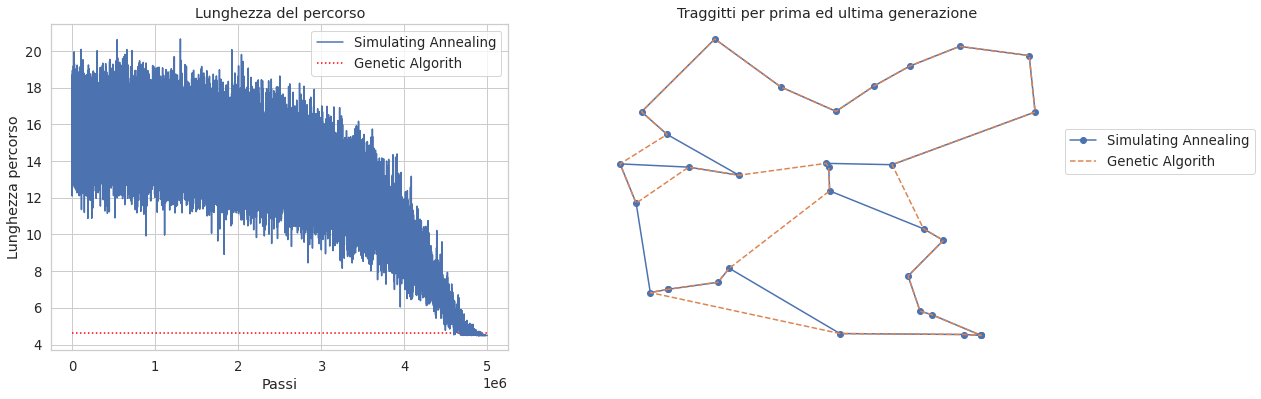

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(18,6));  
ax= ax.ravel()


ax[0].plot(np.arange(0,len(Fitness)*100,100),Fitness, label='Simulating Annealing')
ax[0].hlines(bestFitness_compare[len(bestFitness_compare)-1], 0, len(Fitness)*100,linestyle=':',color='red', label='Genetic Algorith');


ax[0].legend()
ax[0].set_title('Lunghezza del percorso')
ax[0].set_xlabel('Passi')
ax[0].set_ylabel('Lunghezza percorso')

best_route = np.loadtxt(path+"route_gen_"+str(5000000)+".dat")
best_route = best_route.astype(int)
ax[1].plot(cities[best_route,0], cities[best_route,1], linestyle='-', marker = 'o', label='Simulating Annealing',alpha=1)

best_route = np.loadtxt(path_compare+"route_gen_200.dat")
best_route = best_route.astype(int)
ax[1].plot(cities[best_route,0], cities[best_route,1], linestyle='--', label='Genetic Algorith',alpha=1)

ax[1].legend(bbox_to_anchor=(1.45,0.7), ncol=1);
ax[1].axis('off');
ax[1].set_title('Traggitti per prima ed ultima generazione');

> Vediamo che in questo caso otteniamo un risultato migliore del GA anche se questo richiede $5\cdot 10^6$ passi.

## Parallel computing

In questa seconda parte risolviamo ancora una volta il problema del commesso viaggiatore con GA. Tuttavia diversamente dal caso dell'esercizio 9, adattiamo il codice perchè lavori in parallelo su più core. Questo ci aspettiamo che comporti un aumento delle prestazioni poichè il GA si presta particolarmente bene ad una paralelizzazione delle operazioni. 

Dal punto di vista del codice adattiamo quello dell'esercizio 9.2. In particolare abbiamo modificato il `int main(...)` nel seguente modo:

    int main (int argc, char* argv[]){

        int size, rank;
        MPI_Init(&argc,&argv);
        MPI_Comm_size(MPI_COMM_WORLD, &size);
        MPI_Comm_rank(MPI_COMM_WORLD, &rank);

        Input(rank);

        InizialPopulation();
        FitnessPopulation();
        ...

        for (int i=0; i<=n_iter; i++){

            NewPopulation();
            FitnessPopulation();
            ...
     
            if(i%50==0)
                ExchangeBest();

        }


        MPI_Finalize();
        return 0;
    }

Vediamo che la struttura è la stessa dal momento che il programma deve svolgere lo stesso tipo di funzioni. Tuttavia è stato aggiunto il comando `MPI_init(...)` che avvia la compilazione in parallelo e nella funzione di `Input(..)`  sono stati assegnati `Primes` diversi ai diversi `rank` così da differenziare la dinamica per i 4 core. Ad ogni modo, la modifica più consistente è stata l'aggiunta della funzione `ExchangeBest()`. Essa si occupa di raccogliere i migliori percorsi dai quattro core per crearne una nuova popolazione. Il modo in cui opera è il seguente: 

* Per prima cosa seleziona i migliori percorsi scegliendo i primi `(int)n_pop/4` percorsi dalla popolazione **ordinata** di ciascuno dei core ed eliminando i rimanenti. Il vettore di `struct Population` così ottenuto viene chiamato `pop_to_cut`.

        for (int i =0 ; i<(int)n_pop/4; i++){
            current_pop[i].to_exchange = 1;
        }

        // Create a sort population
        sort(current_pop.begin(), current_pop.end(), compareByToExchange);

        vector<Population> pop_to_cut = current_pop;
        pop_to_cut.erase (pop_to_cut.begin()+(int)n_pop/4, pop_to_cut.end());
        

* Dopodichè per riunire in un unico vettore tutti i `pop_to_cut` associati ad i diversi core, utilizzo la funzione `MPI_Gather`. Tuttavia poiché io devo raccogliere dei `vector<Population>` definisco un nuovo tipo di `MPI_Type` associato alla `struct Population`.

        // DEFINE NEW MPI_TYPE
        const int nitems=3;
        int          blocklengths[3] = {n_cities,1,1};
        MPI_Datatype types[3] = {MPI_INT, MPI_DOUBLE, MPI_INT};
        MPI_Datatype mpi_pop_type;
        MPI_Aint     offsets[3];

        offsets[0] = offsetof(Population, route);
        offsets[1] = offsetof(Population, fitness);
        offsets[2] = offsetof(Population, to_exchange);

        MPI_Type_create_struct(nitems, blocklengths, offsets, types, &mpi_pop_type);
        MPI_Type_commit(&mpi_pop_type);
        
        MPI_Gather(pop_to_cut.data(), pop_to_cut.size(), mpi_pop_type, current_pop.data(), pop_to_cut.size(), mpi_pop_type, 0, MPI_COMM_WORLD);


* Infine il vettore `current_pop.data()`, dove sono contenuti i percorsi migliori, viene usato come punto di partenza per la prossima generazione per ogni core. Per fare questo è necessario inviare `current_pop.data()` ai quattro core e questo viene fatto attraverso la funzione `MPI_Bcast()`. 

        MPI_Bcast(current_pop.data(), current_pop.size(), mpi_pop_type, 0, MPI_COMM_WORLD);


### Confronto comportamendo per diversi core

Confrontiamo ora il comportamento per i diversi core. Come parametri della simulazione usiamo esattamente gli stessi dell'esercizio 9.2:

|  ||
|--------|--------|
|$n_{citta'} $|32|
|$n_{individui} $|1000|
|$n_{generazioni} $|200|
|$r_{crossover}$|0.7|
|$r_{mutazioni}$|0.05|

In [8]:
path = '/home/elia/Scrivania/SimulazioneNumerica/Exercises_10/Exercises_10.2/'
path_compare = '/home/elia/Scrivania/SimulazioneNumerica/Exercises_09/Exercises_09.2/'

In [9]:
cities =  np.loadtxt(path+"cities.dat")

bestFitness_compare =  np.loadtxt(path_compare+"fitness_best.dat")
meanFitness_compare =  np.loadtxt(path_compare+"fitness_mean.dat")

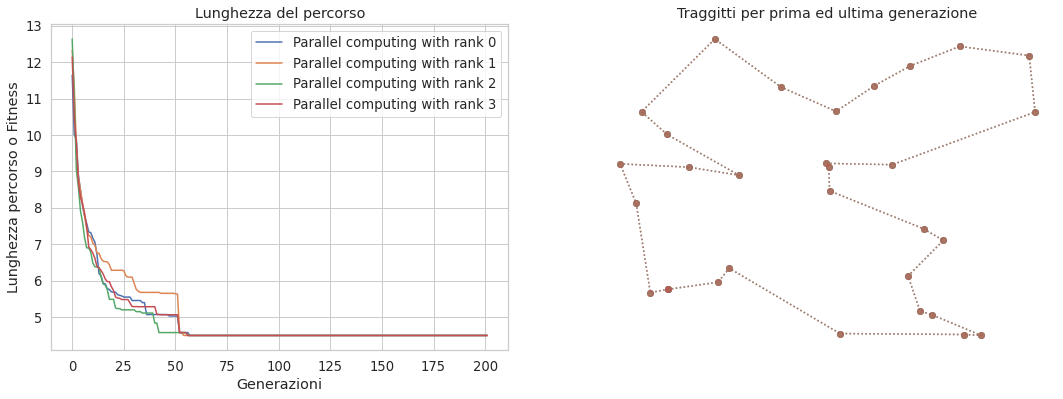

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(18,6));  
ax= ax.ravel()

for i in range(4):
    bestFitness =  np.loadtxt(path+"fitness_best"+str(i)+".dat")
    meanFitness =  np.loadtxt(path+"fitness_mean"+str(i)+".dat")
    ax[0].plot(bestFitness, label='Parallel computing with rank '+str(i))

ax[0].legend()
ax[0].set_title('Lunghezza del percorso')
ax[0].set_xlabel('Generazioni')
ax[0].set_ylabel('Lunghezza percorso o Fitness')


for i in range(4):
    best_route = np.loadtxt(path+"route_gen_200_"+str(i)+".dat")
    best_route = best_route.astype(int)
    ax[1].plot(cities[best_route,0], cities[best_route,1], linestyle=':', marker = 'o', label='Parallel computing with rank '+str(i),alpha=0.5)


ax[1].axis('off');
ax[1].set_title('Traggitti per prima ed ultima generazione');

>Quello che osserviamo è che il percorso migliore è equivalente per tutti i core sebbene la velocità di convergenza per ciascuno sia leggermente diversa. Questo può essere dovuto alle diverse condizioni iniziali.

### Confronto con Standard Computing

Confrontiamo ora il risultato ottenuto con quello dell'esercizio 9.2 a partità di condizioni iniziali. Dal momento che il comportamento dopo $\approx 50$ passi è lo stesso per i diversi core, utilizziamo il rank 0.

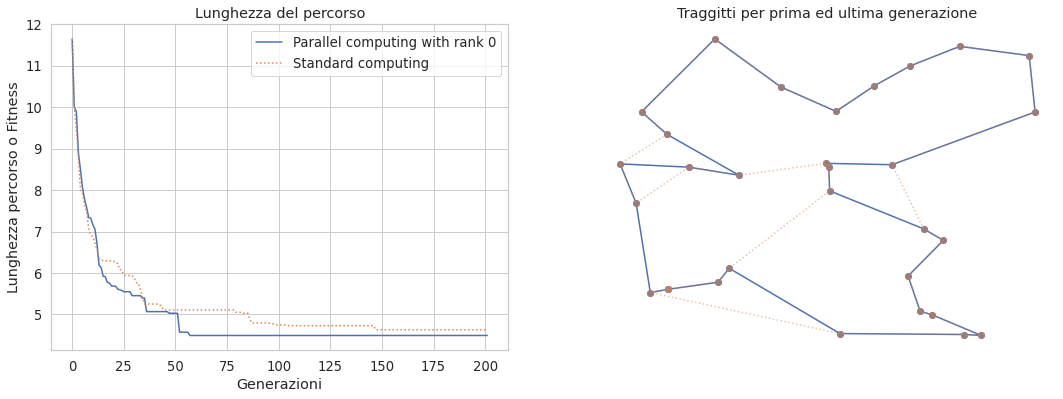

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(18,6));  
ax= ax.ravel()

for i in range(1):
    bestFitness =  np.loadtxt(path+"fitness_best"+str(i)+".dat")
    meanFitness =  np.loadtxt(path+"fitness_mean"+str(i)+".dat")
    ax[0].plot(bestFitness, label='Parallel computing with rank '+str(i))

ax[0].plot(bestFitness_compare, label='Standard computing', linestyle=':')

ax[0].legend()
ax[0].set_title('Lunghezza del percorso')
ax[0].set_xlabel('Generazioni')
ax[0].set_ylabel('Lunghezza percorso o Fitness')



for i in range(1):
    best_route = np.loadtxt(path+"route_gen_200_"+str(i)+".dat")
    best_route = best_route.astype(int)
    ax[1].plot(cities[best_route,0], cities[best_route,1], linestyle='-', marker = 'o', label='Parallel computing with rank '+str(i),alpha=1)

best_route = np.loadtxt(path_compare+"route_gen_200.dat")
best_route = best_route.astype(int)
ax[1].plot(cities[best_route,0], cities[best_route,1], linestyle=':', marker = 'o', label='Standard computing',alpha=0.5)

ax[1].axis('off');
ax[1].set_title('Traggitti per prima ed ultima generazione');

> Vediamo che il GA implementato in parallelo è molto più prestante rispetto al caso in serie. Infatti non solo si ottiene un percorso più breve ma lo si ottiene anche con un numero inferiore di passi.